# Mugloest - 6 ADCP Experiment (March, 2013) 

&nbsp;<br>


# Part 1 - eliminating the top, sigma, rotation
# Pickle dictionary
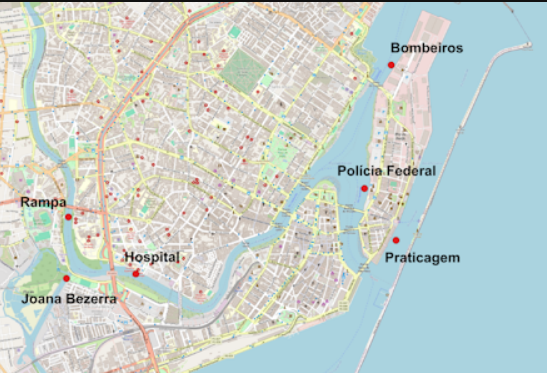

In [14]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors

import sys
sys.path.append(r'd:\guto\gpython\pytools')
import vector_tools as vt
import filtbin

In [15]:
# junta_neap = [time_neap_b, pressure_neap_b, levels_neap_3, v1_neap_b, v2_neap_b, amp_neap_b]
# junta_spring = [time_spring_b, pressure_spring_b, levels_spring_3, v1_spring_b, v2_spring_b, amp_spring_b]
# j = [junta_neap, junta_spring]
with open('ADCP_in_order.pkl', 'rb') as io:
    d = pickle.load(io)

time_n = d[0][0]
pressure_n = d[0][1]
levels_n = d[0][2]
v1_n = d[0][3]
v2_n = d[0][4]
amp_n = d[0][5]
temperature_n = d[0][6]

time_s = d[1][0]
pressure_s = d[1][1]
levels_s = d[1][2]
v1_s = d[1][3]
v2_s = d[1][4]
amp_s = d[1][5]
temperature_s = d[1][6]

### Remove the top and convert to sigma levels
### I did a 2nd function to smooth the sigma levels along the time (below)

In [16]:
def remove_top_sigma_old(t, m, p, z, tol, sl):
    '''
    t = time array
    m - input matrix
    p - pressure array
    z - levels array
    tol - top cut tolerance
    sl = sigma levels
    '''
    new_m = np.full((len(m), sl), np.nan)
    new_z = np.copy(new_m)
    for i in range(len(m)):
        idx = np.where(z < p[i] - tol)[0]

        # create sigma levels
        z_sig = np.linspace(z[0], z[idx[-1]], sl)
        coef_ang = (z[-1] - z[0])/z[-1]
        coef_lin = z[0]
        z_sig = coef_lin + coef_ang*z_sig
        new_m[i,:] = np.interp(z_sig, z[idx], m[i, idx])
        new_z[i,:] = z_sig

    mt = np.array([t for i in range(sl)]).T
    return mt, new_z, new_m

In [17]:
def remove_top_sigma(t, m, p, z, tol, sl):
    '''
    t = time array
    m - input matrix
    p - pressure array
    z - levels array
    tol - top cut tolerance
    sl = sigma levels
    '''
    new_m = np.full((len(m), sl), np.nan)
    new_z = np.copy(new_m)
    c = 0
    for i in range(len(m)):
        # to get the data 'in water' e excluding the near surface
        idx = np.where(z < p[i] - tol)[0]
    
        # create sigma levels between bottom and surface
        z_sig = np.linspace(0, p[i] - tol, sl) # when using z[0], it create a deformation at the bottom!
        
        # to re-scale from the first z   
        coef_ang = ((p[i]-(tol+z[0]))-z[0])/z_sig[-1]
        coef_lin = z[0]
        z_sig2 = coef_lin + coef_ang*z_sig
    
        new_m[i,:] = np.interp(z_sig, z[idx], m[i, idx])
        new_z[i,:] = z_sig2 + z[0]
    
    mt = np.array([t for i in range(sl)]).T

    return mt, new_z, new_m

## Prototyping the funcion
## This create the steeps in the variation of the layers... how tho smooth that! I've done that before...

(0.0, 6.0)

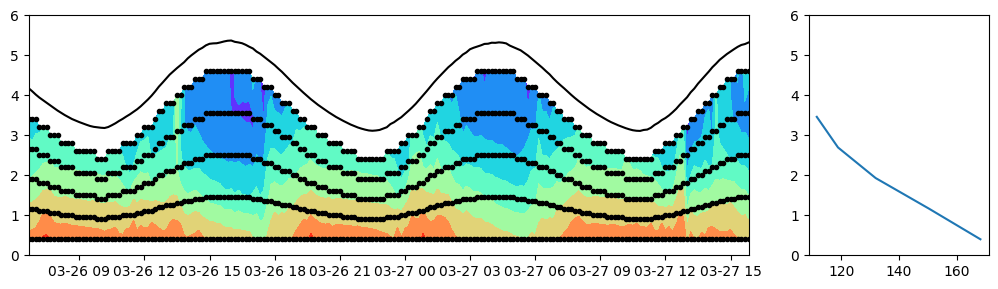

In [18]:
t = time_s[5]
m = amp_s[5]
p = pressure_s[5]
z = levels_s[5]
tol = .6
sl = 5

new_m = np.full((len(m), sl), np.nan)
new_z = np.copy(new_m)
c = 0
for i in range(len(m)):
    # to get the data 'in water' e excluding the near surface
    idx = np.where(z < p[i] - tol)[0]

    # create sigma levels
    z_sig = np.linspace(0, z[idx[-1]], sl) # when using z[0], it create a deformation at the bottom!
    
    # to re-scale from the first z   
    coef_ang = (z_sig[-1]-z[0])/z_sig[-1]
    coef_lin = z[0]
    z_sig2 = coef_lin + coef_ang*z_sig

    new_m[i,:] = np.interp(z_sig, z[idx], m[i, idx])
    new_z[i,:] = z_sig2

mt = np.array([t for i in range(sl)]).T

fig = plt.figure(figsize=(12,3))
ax1 = fig.add_axes([.1,.1, .6, .8])
ax2 = fig.add_axes([.75, .1, .15, .8])
ax1.contourf(mt.T, new_z.T, new_m.T, cmap='rainbow')
ax1.plot(mt.T, new_z.T, 'k.')
ax1.plot(t, p, 'k')
ax1.set_ylim(0, 6)
ylim = ax1.get_ylim()
ax2.plot(np.mean(new_m, axis=0), np.mean(new_z, axis=0))
ax2.set_ylim(ylim)

(0.0, 6.0)

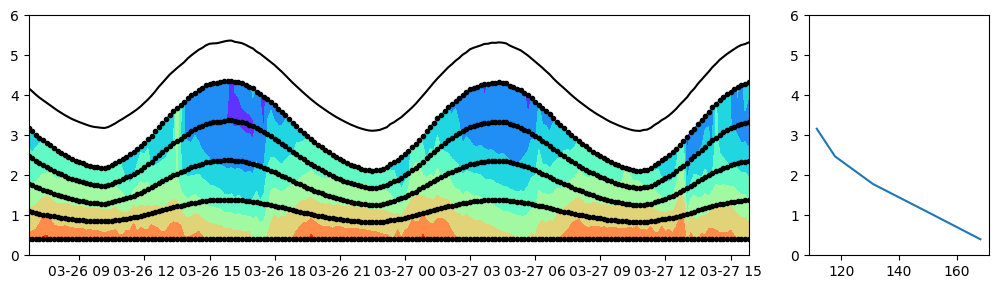

In [19]:
t = time_s[5]
m = amp_s[5]
p = pressure_s[5]
z = levels_s[5]
tol = .6
sl = 5

new_m = np.full((len(m), sl), np.nan)
new_z = np.copy(new_m)
c = 0
for i in range(len(m)):
    # to get the data 'in water' e excluding the near surface (tol = tolerance)
    idx = np.where(z < p[i] - tol)[0]

    # create sigma levels between bottom and surface
    z_sig = np.linspace(0, p[i] - tol, sl) # when using z[0], it create a deformation at the bottom!
    
    # to re-scale from the first z   
    coef_ang = ((p[i]-(tol+z[0]))-z[0])/z_sig[-1]
    coef_lin = z[0] 
    z_sig2 = coef_lin + coef_ang*z_sig 

    new_m[i,:] = np.interp(z_sig, z[idx], m[i, idx])
    new_z[i,:] = z_sig2

mt = np.array([t for i in range(sl)]).T

fig = plt.figure(figsize=(12,3))
ax1 = fig.add_axes([.1,.1, .6, .8])
ax2 = fig.add_axes([.75, .1, .15, .8])
ax1.contourf(mt.T, new_z.T, new_m.T, cmap='rainbow')
ax1.plot(mt.T, new_z.T, 'k.')
ax1.plot(t, p, 'k')
ax1.set_ylim(0, 6)
ylim = ax1.get_ylim()
ax2.plot(np.mean(new_m, axis=0), np.mean(new_z, axis=0))
ax2.set_ylim(ylim)

(0.0, 6.0)

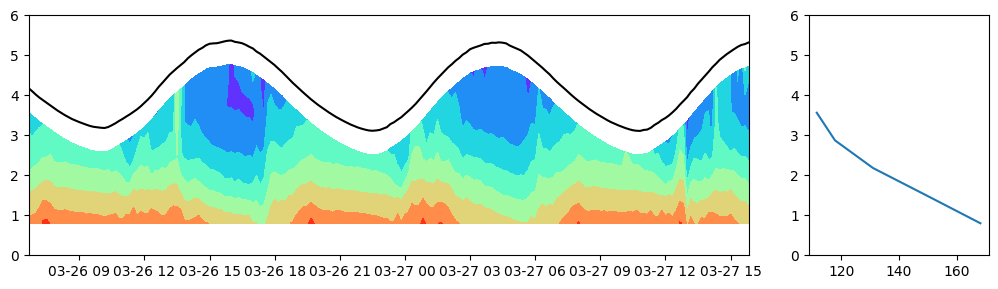

In [20]:
# def remove_top_sigma(m, p, z, tol, sl):
t, a, b = remove_top_sigma(time_s[5], amp_s[5], pressure_s[5], levels_s[5], .6, 5)

fig = plt.figure(figsize=(12,3))
ax1 = fig.add_axes([.1,.1, .6, .8])
ax2 = fig.add_axes([.75, .1, .15, .8])
ax1.contourf(t.T, a.T, b.T, cmap='rainbow')
ax1.plot(time_s[5], pressure_s[5], 'k')
ax1.set_ylim(0, 6)
ylim = ax1.get_ylim()
ax2.plot(np.mean(b, axis=0), np.mean(a, axis=0))
ax2.set_ylim(ylim)

In [21]:
tol

0.6

In [22]:
new_z.shape

(200, 5)

### Testing the function

(1.473714953271028, 12.892764252336448)

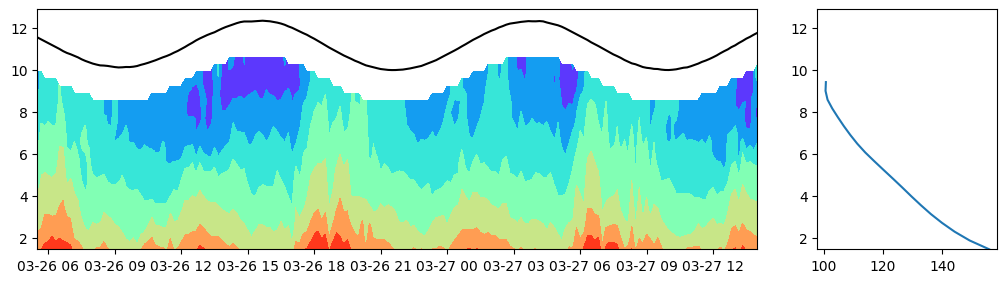

In [23]:
# def remove_top_sigma(m, p, z, tol, sl):
t, a, b = remove_top_sigma_old(time_s[0], amp_s[0], pressure_s[0], levels_s[0], 1.9, 20)

fig = plt.figure(figsize=(12,3))
ax1 = fig.add_axes([.1,.1, .6, .8])
ax2 = fig.add_axes([.75, .1, .15, .8])
ax1.contourf(t.T, a.T, b.T, cmap='rainbow')
ax1.plot(time_s[0], pressure_s[0], 'k')
ylim = ax1.get_ylim()
ax2.plot(np.mean(b, axis=0), np.mean(a, axis=0))
ax2.set_ylim(ylim)

(1.5, 12.89145)

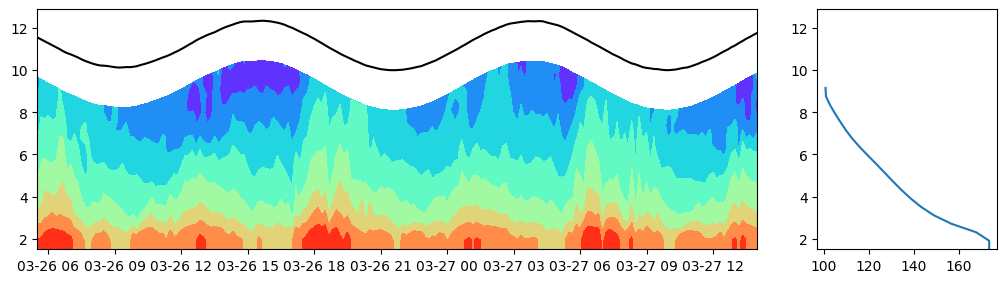

In [24]:
# def remove_top_sigma(m, p, z, tol, sl):
t, a, b = remove_top_sigma(time_s[0], amp_s[0], pressure_s[0], levels_s[0], 1.9, 20)

fig = plt.figure(figsize=(12,3))
ax1 = fig.add_axes([.1,.1, .6, .8])
ax2 = fig.add_axes([.75, .1, .15, .8])
ax1.contourf(t.T, a.T, b.T, cmap='rainbow')
ax1.plot(time_s[0], pressure_s[0], 'k')
ylim = ax1.get_ylim()
ax2.plot(np.mean(b, axis=0), np.mean(a, axis=0))
ax2.set_ylim(ylim)

# Working with the batchs

## 1st, checking the top 'cut'


0.4505882352941177
0.3476714285714283
0.347939086294416
0.42827258566978177
0.2283692307692307
0.69097375


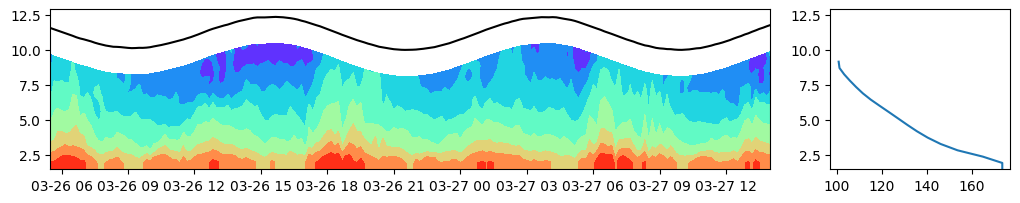

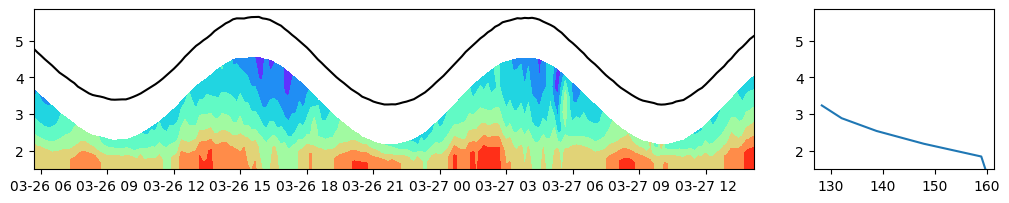

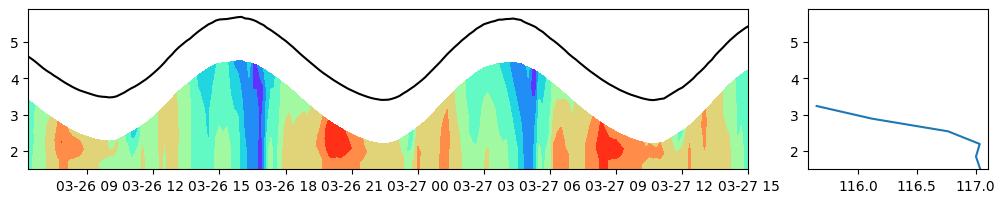

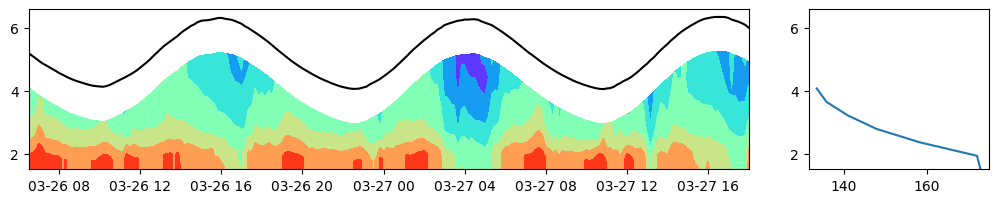

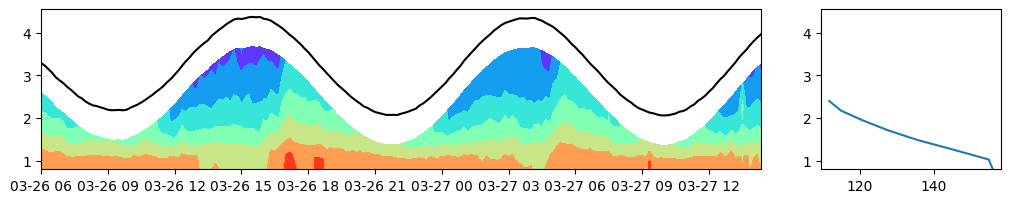

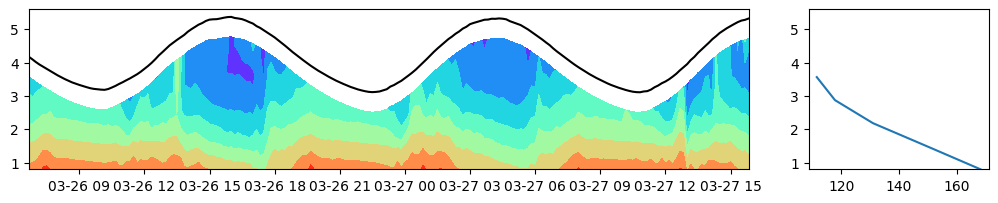

In [25]:
tol_s = [1.9, 1.1, 1.2, 1.1, .7, .6]
sl_s = [18, 6, 6, 7, 8, 5]

time_s_s = []
amp_s_s = []
v1_s_s = []
v2_s_s = []
z_s_s = []
for i in range(6):
    t, a, b = remove_top_sigma(time_s[i], amp_s[i], pressure_s[i], levels_s[i], tol_s[i], sl_s[i])
    _, _, c = remove_top_sigma(time_s[i], v1_s[i], pressure_s[i], levels_s[i], tol_s[i], sl_s[i])
    _, _, d = remove_top_sigma(time_s[i], v2_s[i], pressure_s[i], levels_s[i], tol_s[i], sl_s[i])
    time_s_s.append(t)
    z_s_s.append(a)
    amp_s_s.append(b)
    v1_s_s.append(c)
    v2_s_s.append(d)
    print(np.mean(np.diff(np.mean(a, axis=0))))

for i in range(6):
    fig = plt.figure(figsize=(12,2))
    ax1 = fig.add_axes([.1,.1, .6, .8])
    ax2 = fig.add_axes([.75, .1, .15, .8])
    ax1.contourf(time_s_s[i].T, z_s_s[i].T, amp_s_s[i].T, cmap='rainbow')
    ax1.plot(time_s[i], pressure_s[i], 'k')
    ylim = ax1.get_ylim()
    ax2.plot(np.mean(amp_s_s[i], axis=0), np.mean(z_s_s[i], axis=0))
    ax2.set_ylim(ylim)    

0.4497917166866748
0.3543243523316061
0.3897065934065934
0.41175732600732623
0.41573770491803297
0.5270152173913046


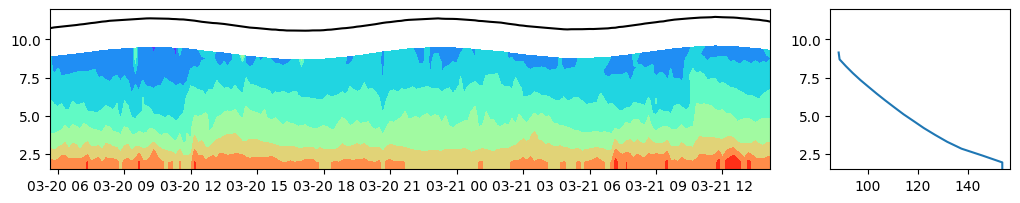

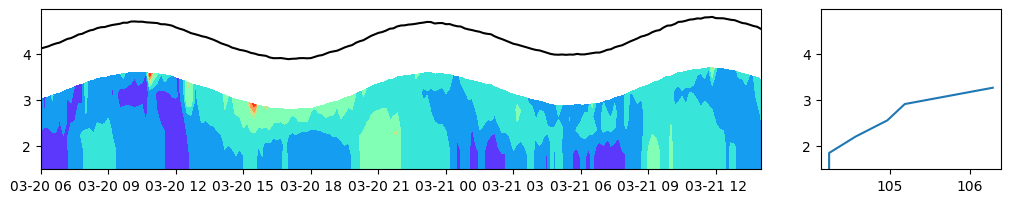

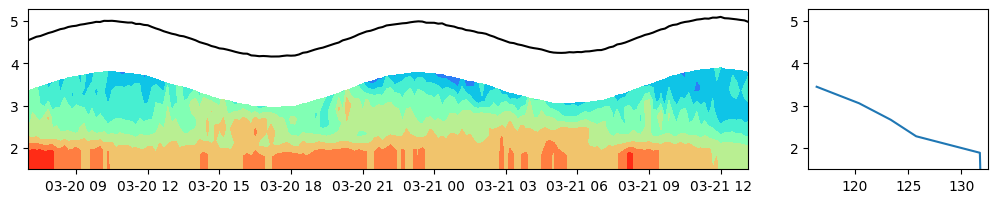

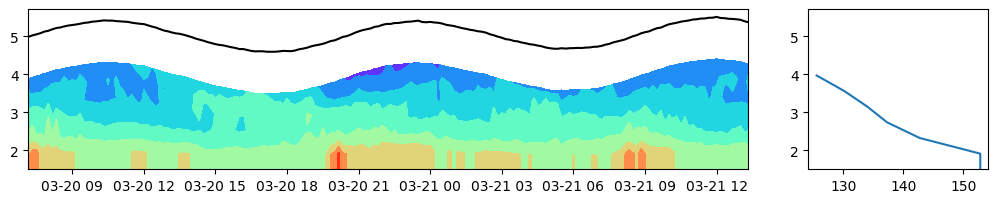

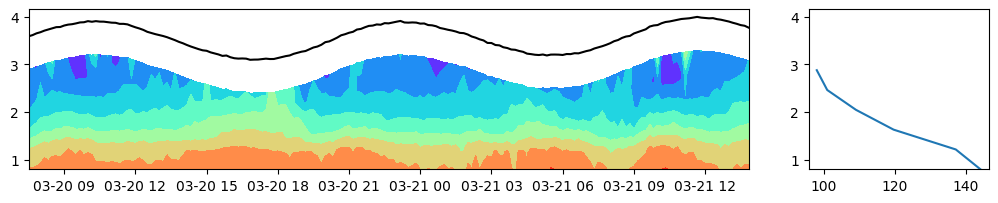

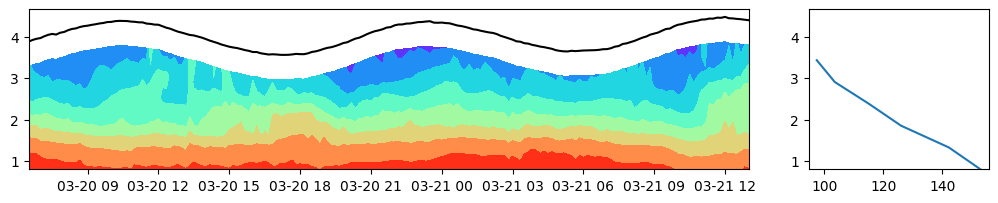

In [26]:
tol_n = [1.9, 1.1, 1.2, 1.1, .7, .6]
sl_n = [18, 6, 6, 7, 6, 6]

time_n_s = []
amp_n_s = []
v1_n_s = []
v2_n_s = []
z_n_s = []
for i in range(6):
    t, a, b = remove_top_sigma(time_n[i], amp_n[i], pressure_n[i], levels_n[i], tol_n[i], sl_n[i])
    _, _, c = remove_top_sigma(time_n[i], v1_n[i], pressure_n[i], levels_n[i], tol_n[i], sl_n[i])
    _, _, d = remove_top_sigma(time_n[i], v2_n[i], pressure_n[i], levels_n[i], tol_n[i], sl_n[i])
    time_n_s.append(t)
    z_n_s.append(a)
    amp_n_s.append(b)
    v1_n_s.append(c)
    v2_n_s.append(d)
    print(np.mean(np.diff(np.mean(a, axis=0))))

for i in range(6):
    fig = plt.figure(figsize=(12,2))
    ax1 = fig.add_axes([.1,.1, .6, .8])
    ax2 = fig.add_axes([.75, .1, .15, .8])
    ax1.contourf(time_n_s[i].T, z_n_s[i].T, amp_n_s[i].T, cmap='rainbow')
    ax1.plot(time_n[i], pressure_n[i], 'k')
    ylim = ax1.get_ylim()
    ax2.plot(np.mean(amp_n_s[i], axis=0), np.mean(z_n_s[i], axis=0))
    ax2.set_ylim(ylim)    

# Convention: Flood + / Ebb -

## 2nd, vector rotation

# NEAP Rotation

[94.8  5.2] 28.53623901559624
[82.8 17.2] 55.166168547493456
[94.6  5.4] -30.988500710144425
[97.4  2.6] 61.20283363241486
[95.4  4.6] 34.98966356938492
[96.9  3.1] 13.749160898979119


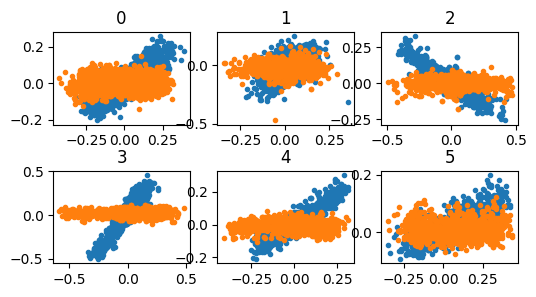

In [27]:
v1_n_r = []
v2_n_r = []
var_exp_n = []
theta_n = []
fig, axs = plt.subplots(2,3, figsize=(6,3))
for i in range(6):
    # ur, vr, variance_explained, theta = vector_pca(u, v)  :: lists or arrays
    _, _, ve, theta = vt.pca_rotation(v1_n_s[i].flatten(), v2_n_s[i].flatten())
    v1_r, v2_r = vt.vector_rotation(v1_n_s[i], v2_n_s[i], theta)

    # flood + / ebb -
    if i in [0, 2, 4]:
        v1_r = -v1_r
        v2_r = -v2_r
    
    v1_n_r.append(v1_r)
    v2_n_r.append(v2_r)
    var_exp_n.append(ve)
    theta_n.append(theta)
    print(ve, theta)

    if i < 3:
        axs[0,i].plot(v1_n_s[i], v2_n_s[i], '.', color='tab:blue')
        axs[0,i].plot(v1_r, v2_r, '.', color='tab:orange')
        axs[0,i].set_title(str(i))
    else:
        axs[1,i-3].plot(v1_n_s[i], v2_n_s[i], '.', color='tab:blue')
        axs[1,i-3].plot(v1_r, v2_r, '.', color='tab:orange')
        axs[1,i-3].set_title(str(i))
plt.subplots_adjust(hspace=0.5)

[98.2  1.8] 27.878230465223943
[99.  1.] 57.384584018180306
[98.2  1.8] -46.36182230390166
[98.6  1.4] 61.07370110906313
[99.1  0.9] 29.813733739287887
[98.  2.] 21.13470346904546


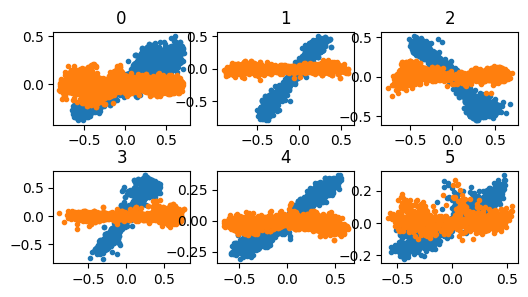

In [28]:
v1_s_r = []
v2_s_r = []
var_exp_s = []
theta_s = []
fig, axs = plt.subplots(2,3, figsize=(6,3))
for i in range(6):
    # ur, vr, variance_explained, theta = vector_pca(u, v)  :: lists or arrays
    _, _, ve, theta = vt.pca_rotation(v1_s_s[i].flatten(), v2_s_s[i].flatten())
    v1_r, v2_r = vt.vector_rotation(v1_s_s[i], v2_s_s[i], theta)

    # flood + / ebb -
    if i in [0, 2, 4]:
        v1_r = -v1_r
        v2_r = -v2_r
    
    v1_s_r.append(v1_r)
    v2_s_r.append(v2_r)
    var_exp_s.append(ve)
    theta_s.append(theta)
    print(ve, theta)
    
    if i < 3:
        axs[0,i].plot(v1_s_s[i], v2_s_s[i], '.', color='tab:blue')
        axs[0,i].plot(v1_r, v2_r, '.', color='tab:orange')
        axs[0,i].set_title(str(i))
    else:
        axs[1,i-3].plot(v1_s_s[i], v2_s_s[i], '.', color='tab:blue')
        axs[1,i-3].plot(v1_r, v2_r, '.', color='tab:orange')
        axs[1,i-3].set_title(str(i))
plt.subplots_adjust(hspace=0.5)

# Plotting NEAP

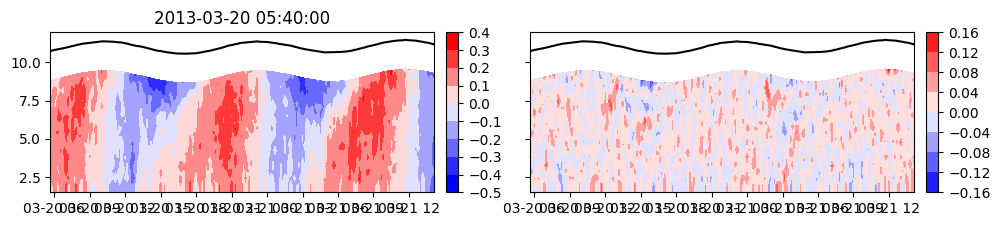

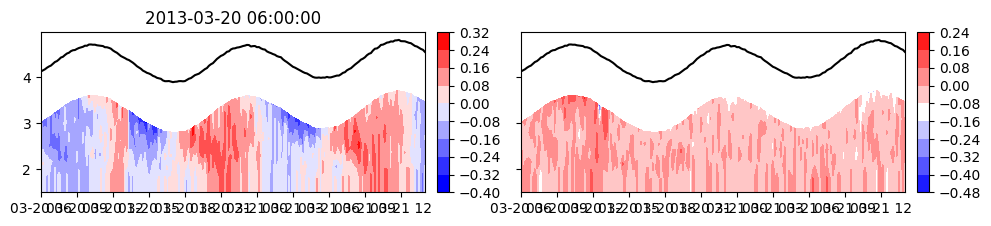

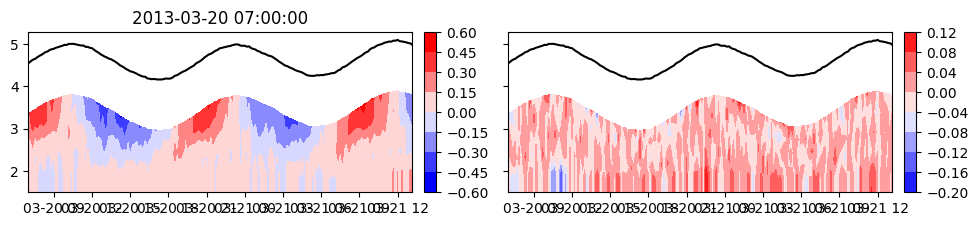

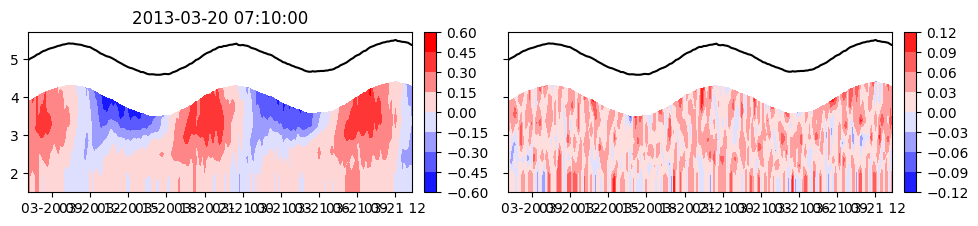

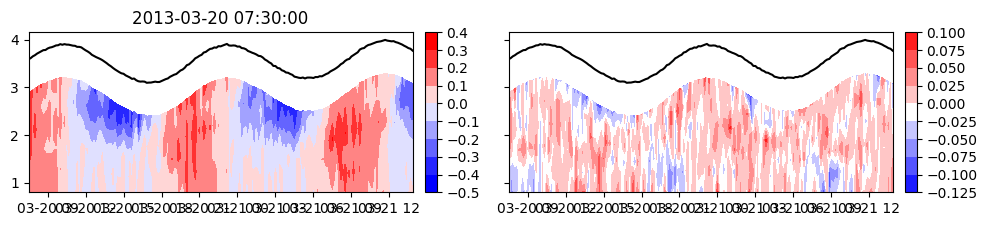

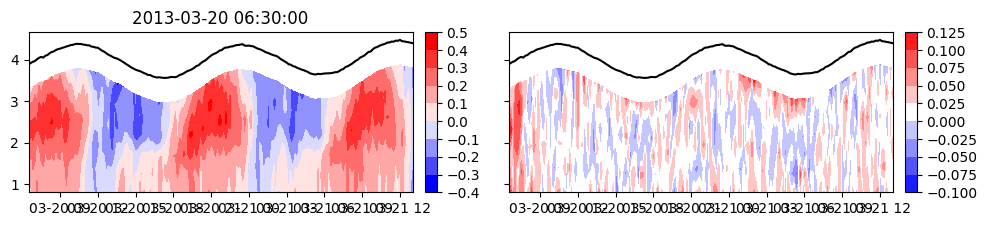

In [29]:
for i in range(6):
    fig = plt.figure(figsize=(12,2))
    ax1 = fig.add_axes([.1, .1, .32, .8])
    ax1_cb = fig.add_axes([.43, .1, .01, .8])
    ax2 = fig.add_axes([.5, .1, .32, .8])
    ax2_cb = fig.add_axes([.83, .1, .01, .8])

    norm = mcolors.TwoSlopeNorm(vmin = np.min(v1_n_r[i]), vcenter=0, vmax = np.max(v1_n_r[i]))
    cb1 = ax1.contourf(time_n_s[i].T, z_n_s[i].T, v1_n_r[i].T, cmap='bwr', norm=norm)
    cb2 = ax2.contourf(time_n_s[i].T, z_n_s[i].T, v2_n_r[i].T, cmap='bwr')

    ax1.set_title(time_n_s[i][0,0])
    
    ax1.plot(time_n[i], pressure_n[i], 'k')
    ax2.plot(time_n[i], pressure_n[i], 'k')

    ax2.set_yticklabels('')

    fig.colorbar(cb1, cax=ax1_cb)
    fig.colorbar(cb2, cax=ax2_cb)

# Plotting SPRING

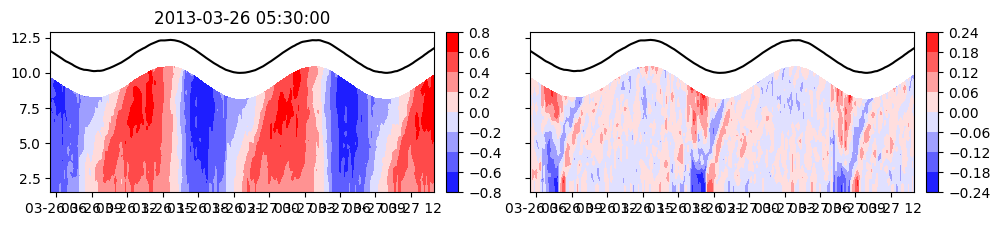

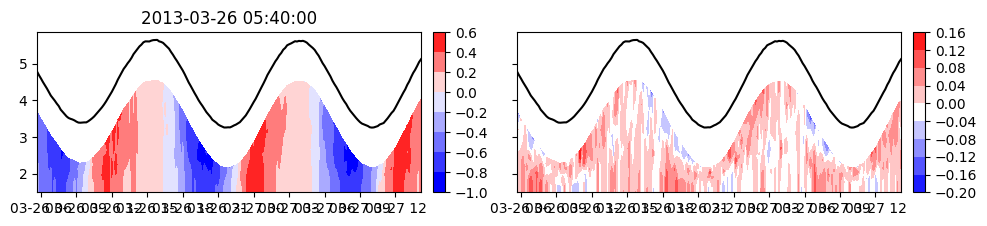

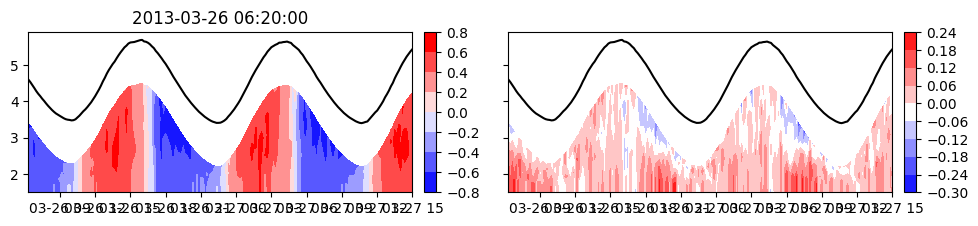

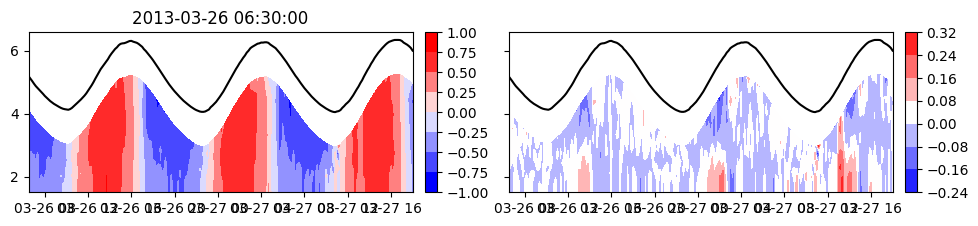

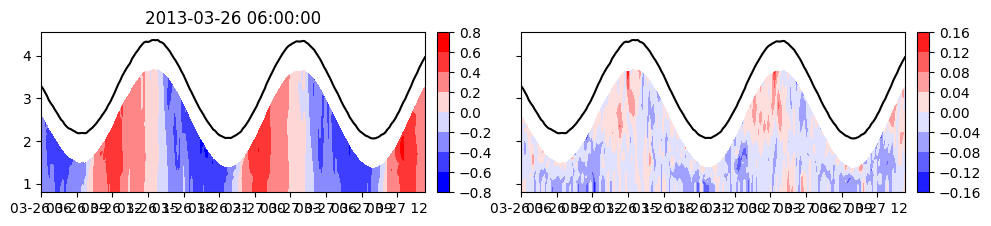

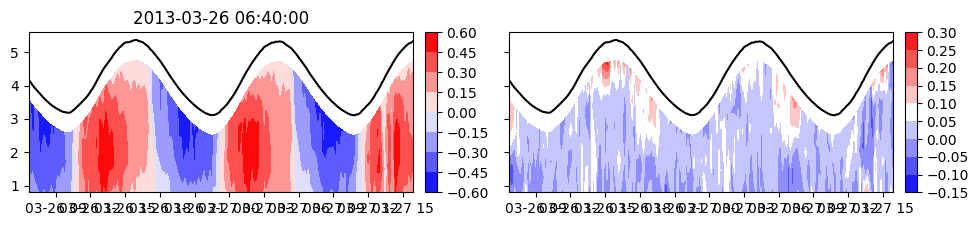

In [30]:
for i in range(6):
    fig = plt.figure(figsize=(12,2))
    ax1 = fig.add_axes([.1, .1, .32, .8])
    ax1_cb = fig.add_axes([.43, .1, .01, .8])
    ax2 = fig.add_axes([.5, .1, .32, .8])
    ax2_cb = fig.add_axes([.83, .1, .01, .8])

    norm = mcolors.TwoSlopeNorm(vmin = np.min(v1_s_r[i]), vcenter=0, vmax = np.max(v1_s_r[i]))
    cb1 = ax1.contourf(time_s_s[i].T, z_s_s[i].T, v1_s_r[i].T, cmap='bwr', norm=norm)
    cb2 = ax2.contourf(time_s_s[i].T, z_s_s[i].T, v2_s_r[i].T, cmap='bwr')

    ax1.set_title(time_s_s[i][0,0])
    
    ax1.plot(time_s[i], pressure_s[i], 'k')
    ax2.plot(time_s[i], pressure_s[i], 'k')

    ax2.set_yticklabels('')

    fig.colorbar(cb1, cax=ax1_cb)
    fig.colorbar(cb2, cax=ax2_cb)

In [31]:
who

a	 amp_n	 amp_n_s	 amp_s	 amp_s_s	 ax1	 ax1_cb	 ax2	 ax2_cb	 
axs	 b	 c	 cb1	 cb2	 coef_ang	 coef_lin	 d	 fig	 
filtbin	 i	 idx	 io	 levels_n	 levels_s	 m	 mcolors	 mdates	 
mt	 new_m	 new_z	 norm	 np	 p	 pickle	 plt	 pressure_n	 
pressure_s	 remove_top_sigma	 remove_top_sigma_old	 sl	 sl_n	 sl_s	 sys	 t	 temperature_n	 
temperature_s	 theta	 theta_n	 theta_s	 time_n	 time_n_s	 time_s	 time_s_s	 tol	 
tol_n	 tol_s	 v1_n	 v1_n_r	 v1_n_s	 v1_r	 v1_s	 v1_s_r	 v1_s_s	 
v2_n	 v2_n_r	 v2_n_s	 v2_r	 v2_s	 v2_s_r	 v2_s_s	 var_exp_n	 var_exp_s	 
ve	 vt	 ylim	 z	 z_n_s	 z_s_s	 z_sig	 z_sig2	 


In [32]:
campaigns = ['neap', 'spring']
stations = ['Praticagem', 'PF', 'Hospital', 'Rampa', 'Bombeiros', 'JoanaBezerra']
things = ['time', 'pressure', 'temperature', 'time2d', 'z2d', 'currents2d'] 

data_adcp = {
            campaign:
                    {
                    station: 
                        {
                        thing: {} for thing in things  
                        } 
                    for station in stations
                    }
            for campaign in campaigns
            }

In [33]:
things_neap = [time_n, pressure_n, temperature_n, time_n_s, z_n_s, v1_n_r]
things_spring = [time_s, pressure_s, temperature_s, time_s_s, z_s_s, v1_s_r]

# populate the dictionary
for i in range(6):
    for it, thing in enumerate(things):
        data_adcp['neap'][stations[i]][thing] = things_neap[it][i]
        data_adcp['spring'][stations[i]][thing] = things_spring[it][i]

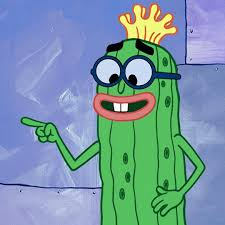

In [34]:
with open('dic_adcp.pkl', 'wb') as io:
    pickle.dump(data_adcp, io)

In [35]:
modelo do dicionário usado para os CTS


campaigns = ['neap', 'spring']
stations = ['a', 'b', 'c', 'd', 'e', 'f']
levels = ['surface', 'bottom']

# creating a nested empty dictionary to be populated in the for loop
data = {
        campaign:
             {
              station:
                      {
                       level: {} for level in levels
                      }
              for station in stations
             }  
        for campaign in campaigns
        }

SyntaxError: invalid syntax (3167326539.py, line 1)